# Lab One
## Caleb Moore, Christian Gould, and Blake Gebhardt

Data Source: https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge

In [1]:
# top cell for imports
import pandas as pd
# TODO make sure to explain why to anywhere its missing from

In [19]:
# Notebook setup
from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')

# Business Understanding [1.5 points total]
### In your own words, give an overview of the dataset. Describe the purpose of the data set you selected (i.e., why and how was this data collected in the first place?).
This dataset has several features of automobiles that can add or subtract from a cars value depending on what is considered desirable. Maybe you want more cylinders and are willing to pay for the bigger engine, maybe leather interior commands a higher premium, maybe the years since it came out have a measuable function of depreciation that can be applied to all vehicles. These statistics are simple to observe from a vehicle's window sticker or assess when a vehicle is traded in. This information can also be looked up with the automobiles vin number. The purpose of this data is commonly to determine an appropriate price for the vehicle.
### What is the prediction task for your data and why are other third parties interested in the result?
We plan to predict the vehicle's price with this data. Third parties are often interested in this information to compare what they paid or what they are planning to pay for a new or used car. They want to know if they are underpaying or if they are getting a reasonable deal. Dealerships, both new and used, also want to determine a price at which a customer would be willing to strike a deal with them. This ensures both parties are happy in the transaction.
### Once you begin modeling, how well would your prediction algorithm need to perform to be considered useful to these third parties?
We plan to shoot for 85% accuracy. We have the luxury of this being a monetary transaction, so while you don't want to be overpaying for a vehicle or have it priced incorrectly and either lose a bunch of money or, worse, lose some money. We feel if we price the cars accurately 85% of the time, we'd be confident in using our model to estimate the price of a vehicle. We also plan to count a vehicle as priced accurately if it is within a range based on the percentage of the cars price or estimated price. This ensures we can achieve a level of accuracy that doesn't require us be spot on the dollar amount of the vehicle, as that isn't very realistic.

# Data Understanding [3 points total]
### [1.5 points] Load the dataset and appropriately define data types. What data type should be used to represent each data attribute? Discuss the attributes collected in the dataset. For datasets with a large number of attributes, only discuss a subset of relevant attributes.  

In [3]:
data = pd.read_csv('car_price_prediction.csv')
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [4]:
# Retroactively adjusting some value types to be better manageable
data.Levy=data.Levy.str.replace('-','0')
data.Levy=data.Levy.astype('int64')
data.Mileage=data.Mileage.apply(lambda x:str(x).replace("km"," "))
data.Mileage=data.Mileage.apply(lambda x:int(x))

In [5]:
print('data shape', data.shape)
print()
num_vars = data.columns [data.dtypes != 'object']
cat_vars = data.columns [data.dtypes == 'object']
print ('numerical:', num_vars.values)
print()
print('categorical:', cat_vars.values)
data.dtypes

data shape (19237, 18)

numerical: ['ID' 'Price' 'Levy' 'Prod. year' 'Mileage' 'Cylinders' 'Airbags']

categorical: ['Manufacturer' 'Model' 'Category' 'Leather interior' 'Fuel type'
 'Engine volume' 'Gear box type' 'Drive wheels' 'Doors' 'Wheel' 'Color']


ID                    int64
Price                 int64
Levy                  int64
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume        object
Mileage               int64
Cylinders           float64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
dtype: object

### Discussing the data types
The default data types are extremely apropriate for this dataset. The ones that already have numerical representation might be useful in createding other categories such as the ratio between doors and airbags or the levy and the size of the engine. These categories can be created when we begin analysis and used in our model making to, hopefully, more acurately predict the price of the vehicle. There are also a fair number of attributes with the object data type, and some of these will be very helpful even if they require some one hot encoding first. We've already discussed some of the useful data we are working with in the responses above, but categories such as engine size, leather interior, mileage, number of doors, level of safety (airbag count), and the year they came out, we think, will all prove to be useful indicators in predicting a vehicles price.

### [1.5 points] Verify data quality: Explain any missing values or duplicate data. Visualize entries that are missing/complete for different attributes. Are those mistakes? Why do these quality issues exist in the data? How do you deal with these problems? Give justifications for your methods (elimination or imputation).  

In [6]:
print('total number of rows:', len(data))
print('duplicate row count:', len(data) - len(data.drop_duplicates()))
print()
print('Count of the missing entries in the data')
print(data[num_vars].isnull().sum())
print(data[cat_vars].isnull().sum())

total number of rows: 19237
duplicate row count: 313

Count of the missing entries in the data
ID            0
Price         0
Levy          0
Prod. year    0
Mileage       0
Cylinders     0
Airbags       0
dtype: int64
Manufacturer        0
Model               0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
dtype: int64


### Discussion of data issues
When doing our initial analysis of the data we plan to simply drop our duplicates since we only have 313 duplicate rows out of the almost twenty thousand. However, we had no missing values for any of our attributes, meaning we have 100% complete data from the start, and we understand this is rare, but it's convienent for this exercise and prediction. If we did have missing values, we would probably drop them like we will the duplicate values so long as it leaves us with a substancial amount of data. It isn't too much of a surprise that we have 100% of our data since these are all relevant and easy to collect on a car-to-car basis.

# Data Visualization (4.5 points total)
### [2 points] Visualize basic feature distributions. That is, plot the dynamic range and exploratory distribution plots (like boxplots, histograms, kernel density estimation) to better understand the data. Describe anything meaningful or potentially useful you discover from these visualizations. These may also help to understand what data is missing or needs imputation. Note: You can also use data from other sources to bolster visualizations. Visualize at least five plots, at least one categorical. 

In [7]:
# imports
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sb

print(len(data))

# eliminate outliers in the rows for price
q_low = data["Price"].quantile(0.10)
q_hi  = data["Price"].quantile(0.90)
data = data[(data["Price"] < q_hi) & (data["Price"] > q_low)]

# eliminate outliers in the rows for years
q_low = data["Prod. year"].quantile(0.10)
q_hi  = data["Prod. year"].quantile(0.90)
data = data[(data["Prod. year"] < q_hi) & (data["Prod. year"] > q_low)]

#ensure our dataset is still large enough to proceed after the drops
print(len(data))

# from sklearn.model_selection import train_test_split
# splitting to train and test
# data, test = train_test_split(data, test_size=0.2)
# answers = test[['Price', 'ID']]
# test = test.drop(columns=['Price'])

19237
11636


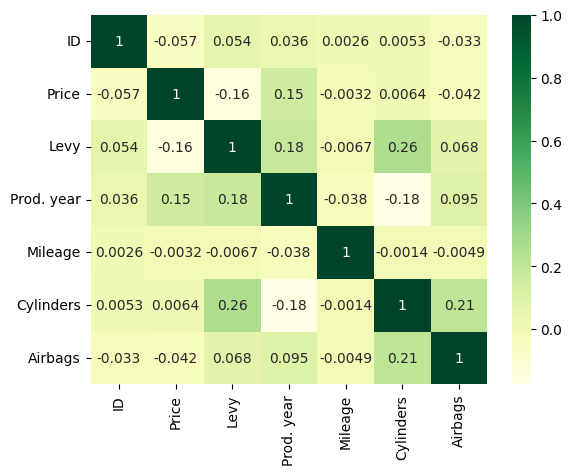

<AxesSubplot: xlabel='Airbags', ylabel='Density'>

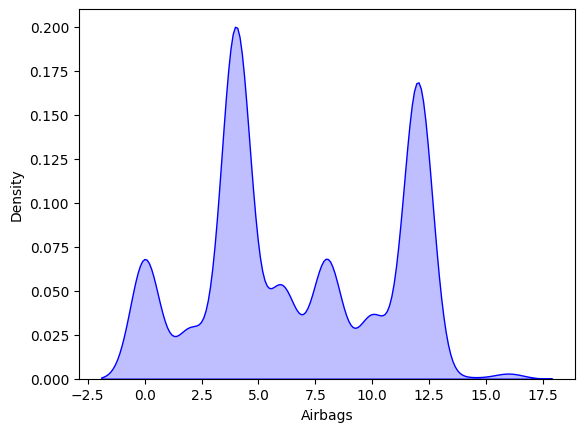

In [8]:
# begin with basic visualizations of the default data to price
# some graph and attribute analysis insporation from: https://www.kaggle.com/code/giridharanp/car-price-predictor

#start by looking at histograms for the categorical attributes
# for catgegory in cat_vars:
#     plt.figure(figsize=[18,8])
#     sb.countplot(x=data[catgegory])
#     plt.xticks(rotation=90)
#     plt.tight_layout()
#     plt.show()
# maybe do correlation map

# then we will check out a heat map to show the intensity of the correlation between some of the variables
sb.heatmap(data=data.corr(),cmap='YlGn',annot=True)
plt.show()

# and now a graphed version of the heatmap
# sb.pairplot(data[num_vars])
# plt.show()

# A neat way of looking at airbag density
sb.kdeplot(data['Airbags'], color='b', shade=True)


### [2.5 points] Ask three interesting questions that are relevant to your dataset and explore visuals that help answer these questions. Use whichever visualization method is appropriate for your data.  Important: Interpret the implications for each visualization. 

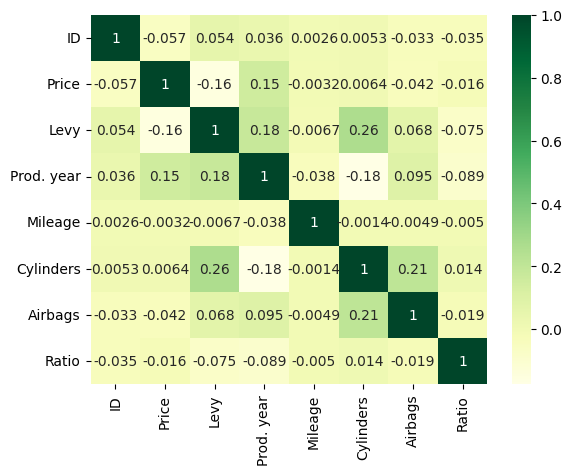

In [9]:
# Question one: will making a category that relates the different numerical values to each other aid in finding a correlation to price
data['Ratio'] = (data['Airbags'] + data['Cylinders'] + data['Prod. year']) / data['Mileage']

# check the heatmap
#TODO change to coorelation map?
sb.heatmap(data=data.corr(),cmap='YlGn',annot=True)
plt.show()

In [10]:
# Question two: would it be worth encoding some values like color, levy, etc, and if so, which ones should we try?
print(data['Color'].unique())
print()
print(data['Doors'].unique())
print()
print(data['Leather interior'].unique())
print()
print(data['Fuel type'].unique())
print()
print(data['Gear box type'].unique())
print()
print(data['Drive wheels'].unique())
print()
print(data['Wheel'].unique())
print()
print(data['Category'].unique())

['Silver' 'Black' 'White' 'Blue' 'Grey' 'Sky blue' 'Orange' 'Green' 'Red'
 'Yellow' 'Golden' 'Beige' 'Brown' 'Carnelian red' 'Purple' 'Pink']

['04-May' '02-Mar' '>5']

['Yes' 'No']

['Hybrid' 'Petrol' 'Diesel' 'Plug-in Hybrid' 'LPG' 'CNG' 'Hydrogen']

['Automatic' 'Tiptronic' 'Variator' 'Manual']

['4x4' 'Front' 'Rear']

['Left wheel' 'Right-hand drive']

['Jeep' 'Hatchback' 'Sedan' 'Goods wagon' 'Minivan' 'Universal' 'Coupe'
 'Microbus' 'Pickup' 'Cabriolet' 'Limousine']


In [11]:
# These have too many categories to encode effectively
print(data['Engine volume'].unique())
print()
print(data['Levy'].unique())

['3.5' '3' '1.3' '2.5' '1.8' '1.6' '2.2 Turbo' '3.3' '2.0 Turbo'
 '3.0 Turbo' '2' '2.4' '1.5' '2.3' '1.5 Turbo' '1.6 Turbo' '2.2' '4.7'
 '1.4' '3.2' '3.8' '4.6' '5' '1.2' '1.7' '2.9' '1.8 Turbo' '2.4 Turbo' '4'
 '1.9' '5.5' '5.3' '0.7' '4.8' '1.4 Turbo' '5.4' '4.4' '1.3 Turbo' '3.7'
 '1' '3.6' '0.8' '2.7' '3.5 Turbo' '4.8 Turbo' '6.7' '6.2' '1.2 Turbo'
 '3.4' '1.7 Turbo' '5.7' '2.5 Turbo' '2.8 Turbo' '0.4' '4.2' '2.9 Turbo'
 '4.6 Turbo' '1.9 Turbo' '4.4 Turbo' '2.7 Turbo' '20' '2.3 Turbo'
 '3.7 Turbo' '0' '2.8' '0.2' '2.1 Turbo' '0.7 Turbo' '4.5' '5.5 Turbo'
 '3.2 Turbo' '0.6' '7.3' '0.1' '4.7 Turbo' '4.5 Turbo' '0.8 Turbo' '1.1'
 '5.6' '2.1' '6.3' '1.0 Turbo' '3.6 Turbo' '3.9' '2.6' '5.0 Turbo'
 '6.3 Turbo' '5.4 Turbo' '4.3' '0.3 Turbo' '5.2']

[ 1399  1018     0   862   446   761   394  1053  1055  1850   531   586
   583  1537  1288   915   707  1486   751   382   503  1104   639   629
   530   640   765   777   934   769   645  2455  1324  1187   781  1111
   760   642  1095   966 

In [12]:
# Looks like it might be worth encoding the values above besides the levy and the engine volume
# encoding colors
hot = pd.get_dummies(data['Color'])
data = data.join(hot)
data = data.drop(columns=['Color'])

# encoding fuel type
hot = pd.get_dummies(data['Fuel type'])
data = data.join(hot)
data = data.drop(columns=['Fuel type'])

# encoding Gear box type
hot = pd.get_dummies(data['Gear box type'])
data = data.join(hot)
data = data.drop(columns=['Gear box type'])

# encoding Wheel
hot = pd.get_dummies(data['Wheel'])
data = data.join(hot)
data = data.drop(columns=['Wheel'])

# encoding Drive wheels
hot = pd.get_dummies(data['Drive wheels'])
# naming clarification
hot = hot.rename(columns={'Front': 'FWD', 'Rear': 'RWD'})
data = data.join(hot)
data = data.drop(columns=['Drive wheels'])

# encoding leather interior
hot = pd.get_dummies(data['Leather interior'])
# naming clarification
hot = hot.rename(columns={'Yes': 'Leather', 'No': 'Non-leather'})
data = data.join(hot)
data = data.drop(columns=['Leather interior'])

# encoding car type category
hot = pd.get_dummies(data['Category'])
data = data.join(hot)
data = data.drop(columns=['Category'])

data.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Engine volume', 'Mileage', 'Cylinders', 'Doors', 'Airbags', 'Ratio',
       'Beige', 'Black', 'Blue', 'Brown', 'Carnelian red', 'Golden', 'Green',
       'Grey', 'Orange', 'Pink', 'Purple', 'Red', 'Silver', 'Sky blue',
       'White', 'Yellow', 'CNG', 'Diesel', 'Hybrid', 'Hydrogen', 'LPG',
       'Petrol', 'Plug-in Hybrid', 'Automatic', 'Manual', 'Tiptronic',
       'Variator', 'Left wheel', 'Right-hand drive', '4x4', 'FWD', 'RWD',
       'Non-leather', 'Leather', 'Cabriolet', 'Coupe', 'Goods wagon',
       'Hatchback', 'Jeep', 'Limousine', 'Microbus', 'Minivan', 'Pickup',
       'Sedan', 'Universal'],
      dtype='object')

In [13]:
# Question three: which values would detract from rather than add to making a model and then dropping them
data = data.drop(columns=['ID', 'Engine volume', 'Model', 'Manufacturer', 'Mileage', 'Ratio'])
data.columns
# TODO explain why we dropped these columns

Index(['Price', 'Levy', 'Prod. year', 'Cylinders', 'Doors', 'Airbags', 'Beige',
       'Black', 'Blue', 'Brown', 'Carnelian red', 'Golden', 'Green', 'Grey',
       'Orange', 'Pink', 'Purple', 'Red', 'Silver', 'Sky blue', 'White',
       'Yellow', 'CNG', 'Diesel', 'Hybrid', 'Hydrogen', 'LPG', 'Petrol',
       'Plug-in Hybrid', 'Automatic', 'Manual', 'Tiptronic', 'Variator',
       'Left wheel', 'Right-hand drive', '4x4', 'FWD', 'RWD', 'Non-leather',
       'Leather', 'Cabriolet', 'Coupe', 'Goods wagon', 'Hatchback', 'Jeep',
       'Limousine', 'Microbus', 'Minivan', 'Pickup', 'Sedan', 'Universal'],
      dtype='object')

In [14]:
# Finally, change some types for better readability to the model
data['Doors'].replace({'04-May':4, '02-Mar': 2, '>5':5}, inplace = True)
data['Doors'] = data['Doors'].astype('int64')
data['Cylinders'] = data['Cylinders'].astype('int64')
data.columns

Index(['Price', 'Levy', 'Prod. year', 'Cylinders', 'Doors', 'Airbags', 'Beige',
       'Black', 'Blue', 'Brown', 'Carnelian red', 'Golden', 'Green', 'Grey',
       'Orange', 'Pink', 'Purple', 'Red', 'Silver', 'Sky blue', 'White',
       'Yellow', 'CNG', 'Diesel', 'Hybrid', 'Hydrogen', 'LPG', 'Petrol',
       'Plug-in Hybrid', 'Automatic', 'Manual', 'Tiptronic', 'Variator',
       'Left wheel', 'Right-hand drive', '4x4', 'FWD', 'RWD', 'Non-leather',
       'Leather', 'Cabriolet', 'Coupe', 'Goods wagon', 'Hatchback', 'Jeep',
       'Limousine', 'Microbus', 'Minivan', 'Pickup', 'Sedan', 'Universal'],
      dtype='object')

### Final categories overviews

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11636 entries, 0 to 19235
Data columns (total 51 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Price             11636 non-null  int64
 1   Levy              11636 non-null  int64
 2   Prod. year        11636 non-null  int64
 3   Cylinders         11636 non-null  int64
 4   Doors             11636 non-null  int64
 5   Airbags           11636 non-null  int64
 6   Beige             11636 non-null  uint8
 7   Black             11636 non-null  uint8
 8   Blue              11636 non-null  uint8
 9   Brown             11636 non-null  uint8
 10  Carnelian red     11636 non-null  uint8
 11  Golden            11636 non-null  uint8
 12  Green             11636 non-null  uint8
 13  Grey              11636 non-null  uint8
 14  Orange            11636 non-null  uint8
 15  Pink              11636 non-null  uint8
 16  Purple            11636 non-null  uint8
 17  Red               11636 non-nul

In [16]:
data.max(axis=0)
data.columns

Index(['Price', 'Levy', 'Prod. year', 'Cylinders', 'Doors', 'Airbags', 'Beige',
       'Black', 'Blue', 'Brown', 'Carnelian red', 'Golden', 'Green', 'Grey',
       'Orange', 'Pink', 'Purple', 'Red', 'Silver', 'Sky blue', 'White',
       'Yellow', 'CNG', 'Diesel', 'Hybrid', 'Hydrogen', 'LPG', 'Petrol',
       'Plug-in Hybrid', 'Automatic', 'Manual', 'Tiptronic', 'Variator',
       'Left wheel', 'Right-hand drive', '4x4', 'FWD', 'RWD', 'Non-leather',
       'Leather', 'Cabriolet', 'Coupe', 'Goods wagon', 'Hatchback', 'Jeep',
       'Limousine', 'Microbus', 'Minivan', 'Pickup', 'Sedan', 'Universal'],
      dtype='object')

# Exceptional Work (1 points total)
### (0.4) The overall quality of the report as a coherent, useful, and polished product will be reflected here. Does it make sense overall. Do your visualizations answer the questions you put forth in your business analysis? Do you properly and consistently cite sources and annotate changes made to base code?

In [17]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score

x = data.drop(['Price'], axis=1).values
y = data['Price'].values
x = MinMaxScaler().fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=5)

# super useful regression help 
# https://www.kaggle.com/code/moe5998/car-price-prediction-eda-ml-regression-models
lr  = LinearRegression()
knn = KNeighborsRegressor(n_neighbors=8)
dt  = DecisionTreeRegressor(max_depth = 5)
rf  = RandomForestRegressor(n_estimators=100, max_features= 7)
ada = AdaBoostRegressor( n_estimators=150, learning_rate =.08)
gbr = GradientBoostingRegressor(max_depth=7, n_estimators=500, learning_rate =.05)
xgb = XGBRegressor(max_depth = 7, n_estimators=500, learning_rate =.05)
cb  = CatBoostRegressor(learning_rate =.07, max_depth =7, verbose=0)

regressors = [('Linear Regression', lr), ('K Nearest Neighbours', knn),('Decision Tree', dt), ('Random Forest', rf), ('AdaBoost', ada),('Gradient Boosting Regressor', gbr),('XGBRegressor', xgb),('CatBoostRegressor', cb)]

for regressor_name, regressor in regressors:

    regressor.fit(x_train, y_train)    
  
    y_pred = regressor.predict(x_test)
    accuracy = round(r2_score(y_test,y_pred),3)*100
    
    print('{:s} : {:.0f} %'.format(regressor_name, accuracy))

Linear Regression : 26 %
K Nearest Neighbours : 52 %
Decision Tree : 44 %
Random Forest : 68 %
AdaBoost : 31 %
Gradient Boosting Regressor : 67 %
XGBRegressor : 67 %
CatBoostRegressor : 67 %


### (0.6) Additional analysis  (5000 level) You have free reign to provide any additional analyses. 

In [18]:
# Try and change something to increase price accuracy